In [1]:
import os
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
URL = './files/'
i = 0

for file in os.listdir(URL):
    df = pd.read_excel(URL + file, skiprows = 9, error_bad_lines=False)
    print(df.head())
    i += 1
    if i == 1:
        break

   14 Jul 2022  £92.6075
0  13 Jul 2022  £93.9680
1  12 Jul 2022  £94.3373
2  11 Jul 2022  £94.3651
3  08 Jul 2022  £94.7963
4  07 Jul 2022  £95.0396


In [10]:
df = pd.read_excel(URL + file, skiprows = 8, error_bad_lines=False)
df.head()

,Date,NAV (GBP)
0,14 Jul 2022,£92.6075
1,13 Jul 2022,£93.9680
2,12 Jul 2022,£94.3373
3,11 Jul 2022,£94.3651
4,08 Jul 2022,£94.7963


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       694 non-null    object
 1   NAV (GBP)  694 non-null    object
dtypes: object(2)
memory usage: 11.0+ KB


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['NAV (GBP)'] = df['NAV (GBP)'].str.replace('£', '')
df['NAV (GBP)'] = df['NAV (GBP)'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       694 non-null    datetime64[ns]
 1   NAV (GBP)  694 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.0 KB


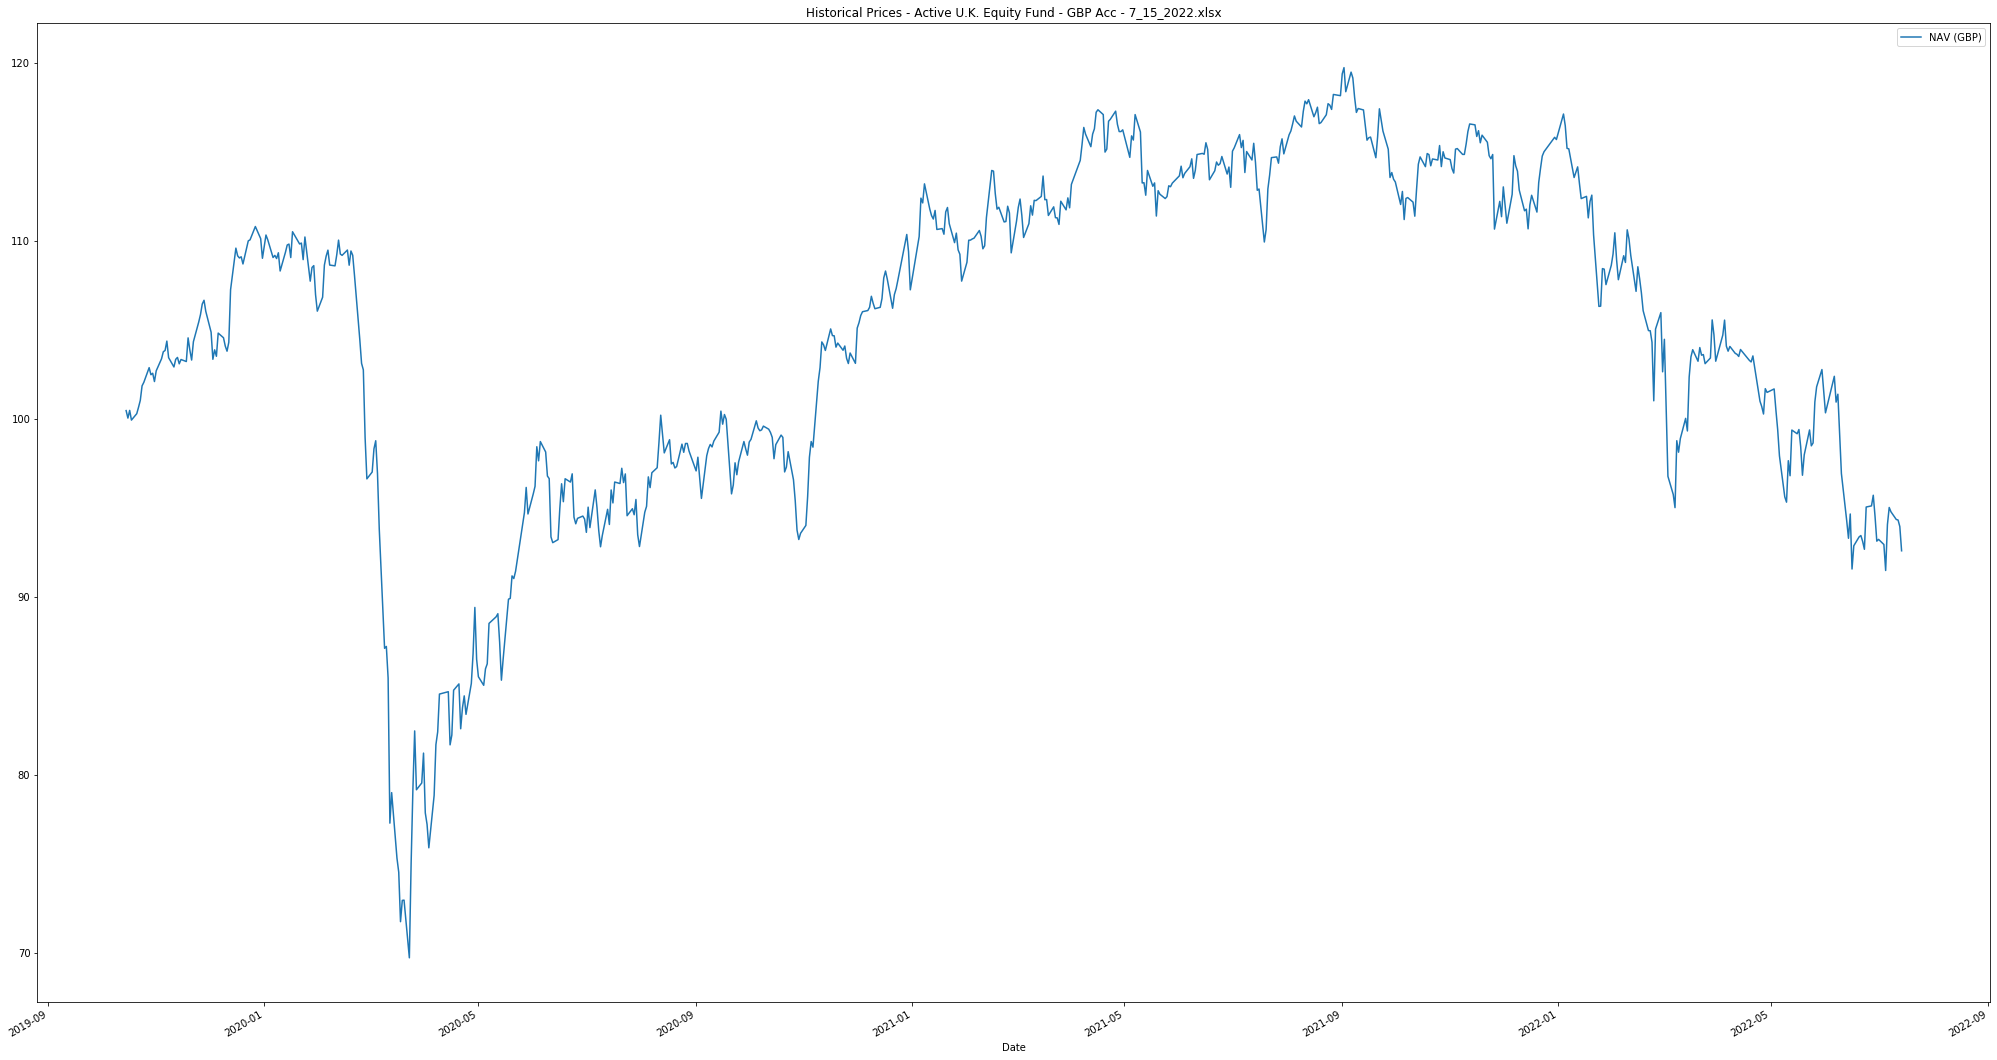

In [22]:
df.plot(x='Date', y='NAV (GBP)', figsize=(35, 20), title=f'{file}')
plt.show()

In [ ]:
df.plot(x='Date', y='NAV (GBP)', figsize=(35, 20), title=f'{file}')
plt.show()